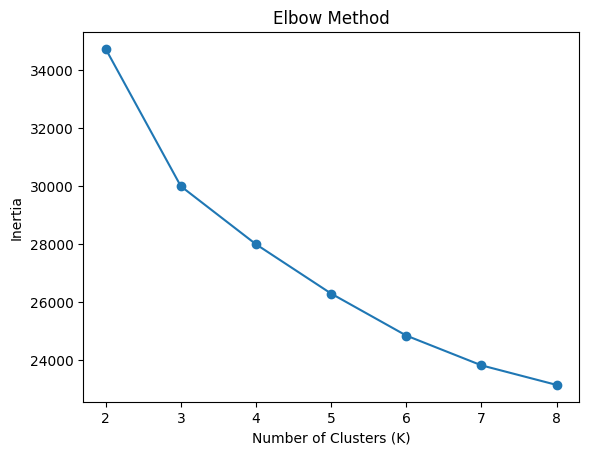

Silhouette Score: 0.17154279192332647


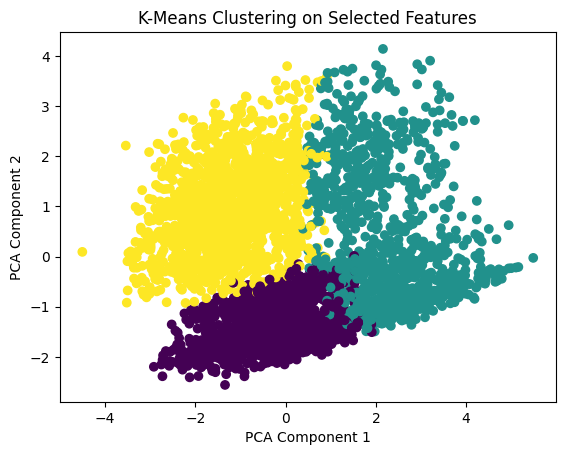

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ======================
# Load dataset
# ======================
df = pd.read_csv("/content/cleaned_data1.csv")

# ======================
# Features (Updated)
# ======================
X = df[
    [
        'male','age','education','currentSmoker','cigsPerDay','BPMeds',
        'prevalentStroke','prevalentHyp','diabetes','totChol',
        'sysBP','diaBP','BMI','heartRate'

    ]
]



# ======================
# Remove outliers (IQR)
# ======================
# Convert all columns to float to avoid potential boolean interpretation issues
X_numeric = X.astype(float)

Q1 = X_numeric.quantile(0.25)
Q3 = X_numeric.quantile(0.75)
IQR = Q3 - Q1

X_clean = X_numeric[~((X_numeric < (Q1 - 1.5 * IQR)) |
                       (X_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

# ======================
# Scaling
# ======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# ======================
# PCA for visualization
# ======================
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X_scaled)

# ======================
# Elbow Method
# ======================
inertia = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Use full scaled features for better clustering
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# ======================
# K-Means
# ======================
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# ======================
# Silhouette Score
# ======================
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", sil_score)

# ======================
# Visualization (2D PCA)
# ======================
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering on Selected Features")
plt.show()


## Clustering Results

- Elbow Method suggests that K = 3 is the optimal number of clusters.
- K-Means clustering successfully divided the dataset into three distinct groups.
- The silhouette score indicates reasonable cluster separation.
- PCA visualization shows three clusters with slight overlap, which is expected in medical datasets.
- The clusters can be interpreted as representing different cardiovascular risk levels.
